In [1]:
from datetime import datetime
from datetime import timedelta
import shapefile
import xml.etree.ElementTree as ET
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
from pyproj import Proj, transform
from pymongo import MongoClient
%matplotlib inline

In [2]:
shp='/media/amassaro/external_2T/telecom_bigdata_2015/data/tim_grid/roma-grid/intersection_Roma_W_GRIDIT_NEW'
crt=shapefile.Reader(shp)
geomet=crt.shapeRecords()
ids=np.array([g.record[0] for g in geomet])

In [17]:
inProj = Proj(init='epsg:32632')
outProj = Proj(init='epsg:4326')
T=[]
for g in geomet:
    item=[]
    for c in g.shape.points:  
        x2,y2 = transform(inProj,outProj,c[0],c[1])
        item.append([x2,y2])
    T.append(item)   
T=np.array(T)

In [18]:
str(T[0][0]).replace('  ',',')

'[ 12.77133412,41.38039625]'

In [19]:
s='{"crs": {"type": "name", "properties": {"name": "urn:ogc:def:crs:EPSG::4326","time":"d"}}, "type": "FeatureCollection", "features": ['
for t in T:
    S='{"geometry":{"type": "Polygon", "coordinates":['+str(list(t)).replace('array','').replace('(','').replace(')','')+']}, "type": "Feature", "id":"0", "properties": {"color": "rgba(0,0,250,0.1)"}}'
    s=s+S+','            
s=s[:-1]
s=s+']}'
out=open('../../geoviz/rome-grid.geojson','w')
out.write(s)
out.close()

In [4]:
tree = ET.parse('/media/amassaro/external_2T/telecom_bigdata_2015/data/external_data/xml_incidenti_mar-apr_2015.xml')
root=tree.getroot()
child=list(root)[1]

In [6]:
latlong_acc=[]
I=np.zeros(len(T))

for j in child:
    if 'Latitudine' in j.attrib.keys():
        latlong_acc.append([float(j.attrib['Longitudine']),float(j.attrib['Latitudine'])])
latlong_acc=np.array(latlong_acc)

#for i  in range(len(T)):
    #t=T[i]
    #polygon=Polygon(t)
    #for p in latlong_acc:
        #point=Point(p)
        #if polygon.contains(point):
            #I[i]+=1   

In [21]:
I[np.where(I==max(I))[0][0]]=0

In [23]:
M=max(I)
s='{"crs": {"type": "name", "properties": {"name": "urn:ogc:def:crs:EPSG::4326","time":"d"}}, "type": "FeatureCollection", "features": ['
for i in range(len(T)):
    if I[i]:
        S='{"geometry":{"type": "Polygon", "coordinates":['+str(list(T[i])).replace('array','').replace('(','').replace(')','')+']}, "type": "Feature", "id":"0", "properties": {"color": "rgba(255,0,0,'+str(I[i]/M)+')"}}'
        s=s+S+','            
s=s[:-1]
s=s+']}'
out=open('../../geoviz/rome-grid-accidents_.geojson','w')
out.write(s)
out.close()

In [30]:
latlong_acc[0]

array([ 12.4402 ,  41.85563])

In [7]:
s='{"crs": {"type": "name", "properties": {"name": "urn:ogc:def:crs:EPSG::4326","time":"d"}}, "type": "FeatureCollection", "features": ['
for i in range(len(latlong_acc)):
        S='{"geometry":{"type": "Point", "coordinates":'+str(list(latlong_acc[i])).replace('array','').replace('(','').replace(')','')+'}, "type": "Feature", "id":"0"}'
        s=s+S+','            
s=s[:-1]
s=s+']}'
out=open('../../geoviz/rome-accidents_.geojson','w')
out.write(s)
out.close()

In [13]:
unipolfile=open('/media/amassaro/external_2T/telecom_bigdata_2015/data/unipol/roma/BDC2015_UnipolsaiClaims2014_RM.csv','r')
latlong_unipol=[]
i=0
for line in unipolfile:
    #print line
    if i>0:
        line=line.split(',')
        latlong_unipol.append([float(line[0]),float(line[1])])
    i+=1

In [16]:
s='{"crs": {"type": "name", "properties": {"name": "urn:ogc:def:crs:EPSG::4326","time":"d"}}, "type": "FeatureCollection", "features": ['
for i in range(len(latlong_acc)):
        S='{"geometry":{"type": "Point", "coordinates":'+str(list(latlong_unipol[i])).replace('array','').replace('(','').replace(')','')+'}, "type": "Feature", "id":"0"}'
        s=s+S+','            
s=s[:-1]
s=s+']}'
out=open('../../geoviz/rome_unipol-accidents.geojson','w')
out.write(s)
out.close()

how many accidents in a cell


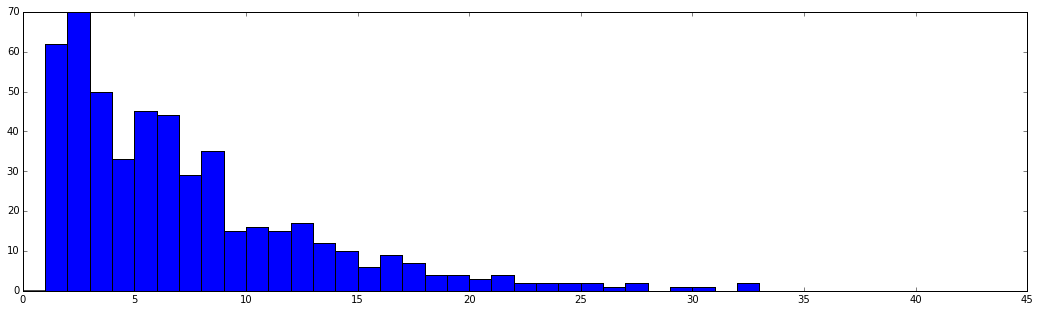

avg 6.91304347826


In [9]:
print('how many accidents in a cell')
plt.hist(I[I!=0],list(range(int(max(I)))))
plt.gcf().set_size_inches(18, 5)
plt.show()
print 'avg', np.average(I[I!=0])

In [10]:
acc_ids=ids[I!=0]